In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_s = pd.read_csv('szl_data.csv', names = ("Anio", "Mes", "dia", "Hora", "Altura" ), header = 0) #La altura está en mm
df_m = pd.read_csv('Mtry_CA_hr.csv', names = ("Date Time", "Water Level", "Sigma", "I", "L"), header = 0)

In [3]:
df_s.dtypes

Anio       int64
Mes        int64
dia        int64
Hora       int64
Altura    object
dtype: object

In [4]:
df_m.dtypes

Date Time       object
Water Level    float64
Sigma          float64
I                int64
L                int64
dtype: object

In [5]:
df_s['date'] = df_s.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'], x[u'dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)
df_m["Date Time"]= pd.to_datetime(df_m["Date Time"], format = '%Y %m %d %H:%M:')

In [6]:
df_s['Altura']=pd.to_numeric(df_s['Altura'], errors = 'coerce')
df_s.apply(lambda x: sum(x.isnull()),axis=0)

Anio        0
Mes         0
dia         0
Hora        0
Altura    185
date        0
dtype: int64

In [7]:
df_s.dtypes

Anio               int64
Mes                int64
dia                int64
Hora               int64
Altura           float64
date      datetime64[ns]
dtype: object

In [8]:
df_m.apply(lambda x: sum(x.isnull()),axis=0)

Date Time      0
Water Level    0
Sigma          0
I              0
L              0
dtype: int64

In [9]:
szl = df_s[(df_s['date'] >= '2016-01-01 00:00:00') & (df_s['date'] <= '2016-03-31 23:00:00')]
mty = df_m

In [10]:
szl.head(),szl.tail(),mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date
 0  2016    1    1     0   670.0 2016-01-01 00:00:00
 1  2016    1    1     1   506.0 2016-01-01 01:00:00
 2  2016    1    1     2   384.0 2016-01-01 02:00:00
 3  2016    1    1     3   330.0 2016-01-01 03:00:00
 4  2016    1    1     4   356.0 2016-01-01 04:00:00,
       Anio  Mes  dia  Hora  Altura                date
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00,
             Date Time  Water Level  Sigma  I  L
 0 2016-12-01 00:00:00        0.035  0.034  0  0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0
 3 2016-12-01 03:00:00        0.129  0.042  0  0
 4 2016-12-01 04:00:00        0.383  0.048  0  0,
                Date Time  Water Level  Sigma  I 

In [11]:
z = np.arange(24.0, 2184.0+24.0, 1.0)
k = np.arange(24.0, 2160.0+24.0, 1.0)

In [12]:
szl['T'] =  pd.Series(z, index =None)
mty['T'] = pd.Series(k, index=None)

C:\Users\Suset\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
szl.head(), szl.tail(), mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date     T
 0  2016    1    1     0   670.0 2016-01-01 00:00:00  24.0
 1  2016    1    1     1   506.0 2016-01-01 01:00:00  25.0
 2  2016    1    1     2   384.0 2016-01-01 02:00:00  26.0
 3  2016    1    1     3   330.0 2016-01-01 03:00:00  27.0
 4  2016    1    1     4   356.0 2016-01-01 04:00:00  28.0,
       Anio  Mes  dia  Hora  Altura                date       T
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00  2203.0
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00  2204.0
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00  2205.0
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00  2206.0
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00  2207.0,
             Date Time  Water Level  Sigma  I  L     T
 0 2016-12-01 00:00:00        0.035  0.034  0  0  24.0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0  25.0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0  26.0
 3 2016-12-01 03:00:00        0.129  0.0

In [14]:
#Amplitudes encontradas para los armónicos de las mareas de El Sauzal
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 2184
# sample spacing
T = 1.0
y = szl["Altura"]/1000.0
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

A0_s = np.absolute(yf[int(0),]/N)
O1_s = np.absolute(yf[int(85),]/N)
S1_s = np.absolute(yf[int(91),]/N)
N2_s = np.absolute(yf[int(173),]/N)
M2_s =  np.absolute(yf[int(176),]/N)
S2_s = np.absolute(yf[int(182),]/N)

In [15]:
#Amplitudes encontradas para los armónicos de las mareas de Montere
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N_d = 2160
# sample spacing
T_d = 1.0
y_hr = mty['Water Level']
yf_hr = fft(y_hr)
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
yplot_hr = fftshift(yf_hr)

A0_m = np.absolute(yf_hr[0,]/N_d)
O1_m = np.absolute(yf_hr[84,]/N_d)
S1_m = np.absolute(yf_hr[90,]/N_d)
N2_m = np.absolute(yf_hr[171,]/N_d)
M2_m = np.absolute(yf_hr[174,]/N_d)
S2_m = np.absolute(yf_hr[180,]/N_d)

In [16]:
A0_m, A0_s, O1_s, O1_s

(0.94090185185185182,
 0.78737499999999994,
 0.061163063617537108,
 0.061163063617537108)

In [17]:
#Periodos en los que se presentan en el Sauzal
f_O1s = xf[int(1092 +85)]
T_S1s = xf[int(1092 +91),]
T_N2s =  xf[int(1092 +173),]
T_M2s =  xf[int(1092 +176),]
T_S2s =  xf[int(1092 +182),]

#Periodos en los que se presentan en el Monterey
T_O1m =  xf_hr[int(1080 +84),]
T_S1m =  xf_hr[int(1080 +90),]
T_N2m =  xf_hr[int(1080 +171),]
T_M2m = xf_hr[int(1080 +174),]
T_S2m = 12.0


In [25]:
y= szl['Altura']/1000
w= -2.0*np.pi
a = 0.0*0.5*np.pi
def f(t):
    return A0_s - 2*(O1_s*np.sin(w*f_O1s*t+a) + S1_s*np.sin(w / T_S1 *t) + N2_s*np.sin(w/T_N2*t+a) + M2_s*np.sin(w/T_M2*t+a) + S2_s*np.sin(w/ T_S2*t))

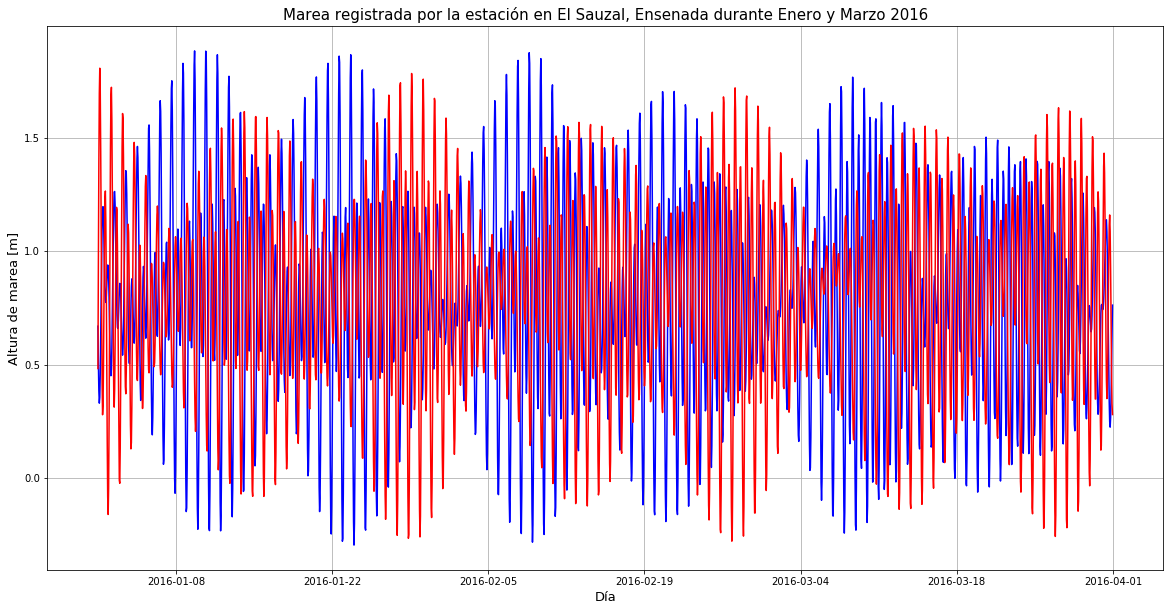

In [26]:
import matplotlib.pyplot as plt
plt.plot(szl['date'], y, 'b-', label ="Altura")
plt.plot(szl['date'], f(szl['T']), 'r-', label='Altura recosntruida')
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
#plt.xlim(pd.Timestamp('2016-01-01 00:00:00'), pd.Timestamp('2016-01-31 23:00:00'))
plt.title('Marea registrada por la estación en El Sauzal, Ensenada durante Enero y Marzo 2016', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [20]:
y1 = f(szl['T'])
y = szl['Altura']/1000

y1.head(10), y.head(10)

(0    1.091849
 1    0.618069
 2    0.181845
 3   -0.123019
 4   -0.234851
 5   -0.138649
 6    0.131141
 7    0.500187
 8    0.873664
 9    1.160458
 Name: T, dtype: float64, 0    0.670
 1    0.506
 2    0.384
 3    0.330
 4    0.356
 5    0.456
 6    0.610
 7    0.793
 8    0.973
 9    1.114
 Name: Altura, dtype: float64)

In [21]:
max(y), max(y1)

(1.8859999999999999, 1.8543888234867847)

In [22]:
np.mean(np.abs(y1-y))/np.mean(szl['Altura'])*100

0.0456794807060346

In [23]:
w= -2.0*np.pi
a = 0.0*0.5*np.pi
def g(t):
    return A0_m + 2*(O1_m*np.sin(w/T_O1*t+a) + S1_m*np.sin(w / T_S1 *t) + N2_m*np.sin(w/T_N2*t+a) + M2_m*np.sin(w/T_M2*t+a) + S2_m*np.sin(w/ T_S2*t))

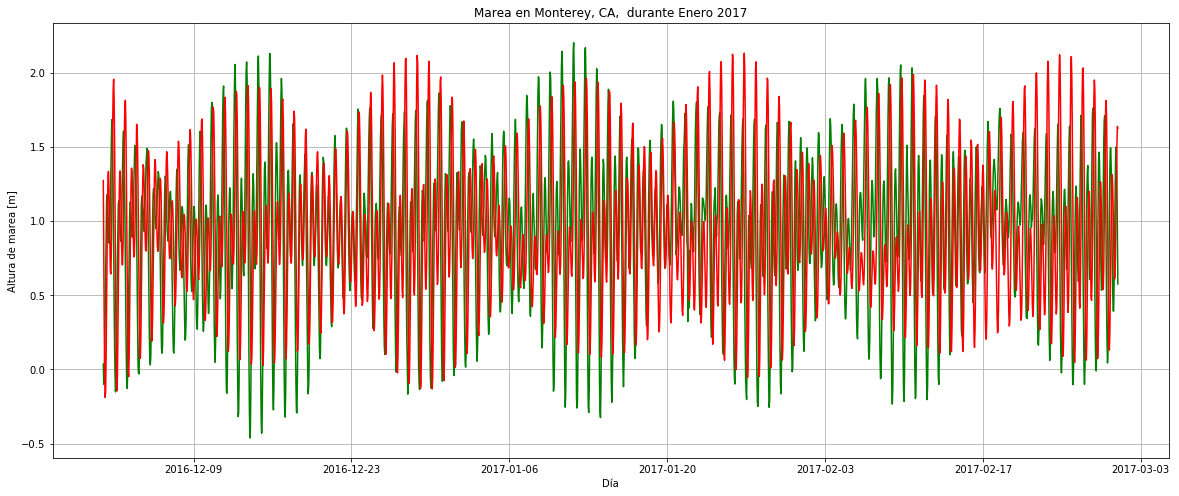

In [24]:
plt.plot(mty[u'Date Time'], mty[u'Water Level'], 'g', label ="Altura")
plt.plot(mty['Date Time'], g(mty['T']), 'r-', label='Altura recosntruida')
plt.ylabel('Altura de marea [m]')
plt.xlabel('Día')
plt.title('Marea en Monterey, CA,  durante Enero 2017')
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

In [ ]:
y_m = mty['Water Level']
y1_m = g(mty['T'])
y_m.head(10), y1_m.head(10)

In [ ]:
np.mean(np.abs(y1_m-y_m)/np.mean(mty['Water Level']))

In [ ]:
np.mean(y1_m), np.mean(y_m), max(y1_m), max(y_m), min(y1_m), min(y_m)

In [ ]:
np.mean(np.abs(y1_m-y_m))